# AdaBoost Regression: Predicting Player Market Values

## What is AdaBoost Regression?
AdaBoost can be adapted for regression tasks where it:
1. Combines multiple weak regressors into a strong ensemble
2. Adapts to hard-to-predict examples by giving them more weight
3. Builds regressors sequentially, each trying to correct errors from previous ones

## Our Task
We'll use AdaBoost regression to predict player market values based on their attributes. This should improve upon our basic linear regression model by capturing more complex relationships in the data.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set the Seaborn theme
sns.set_theme()

## Data Preparation
We'll use the same features as our linear regression model:
- Overall Rating (primary indicator of player quality)
- Age (younger players often have higher market value potential)
- League Level (higher leagues typically mean higher values)
- Contract Duration (affects market value)

AdaBoost should be particularly effective at handling non-linear relationships between these features and market values.

In [7]:
players_df = pd.read_csv("../data/players_data.csv")

# Select features for prediction
features = ["overall", "age", "league_level", "club_contract_valid_until_year"]
# Remove rows with NaN or null values
filtered_df = players_df.dropna(subset=features + ['value_eur'])
X = filtered_df[features].values
y = filtered_df['value_eur'].values

# Scale features and target because they are too big for mse
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (12775, 4)
Test set shape: (5475, 4)


/var/folders/pz/s1ggtx853xx_qxny9g89ffgm0000gn/T/ipykernel_37498/185443496.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  players_df = pd.read_csv("../data/players_data.csv")


## Model Training

In [8]:
# Create and train AdaBoost regressor
ada_reg = AdaBoostRegressor(
    LinearRegression(),
    n_estimators=50,
    learning_rate=0.1,
    random_state=42
)
ada_reg.fit(X_train, y_train)

# Make predictions
ada_y_pred = ada_reg.predict(X_test)

## Model Evaluation

The booster did make the regression line steeper. However, the MSE is greater.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, ada_y_pred)
r2 = r2_score(y_test, ada_y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")



Mean Squared Error: 1.1987
R² Score: -0.1079


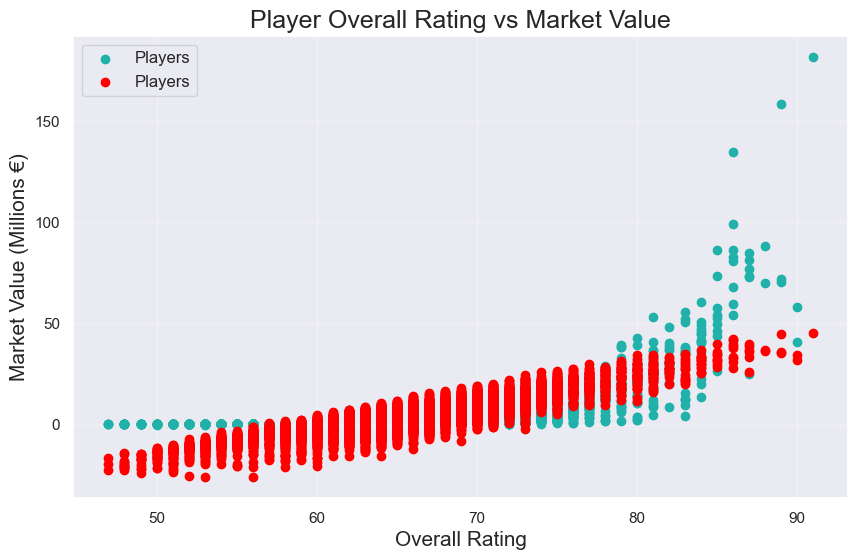

In [12]:
# Plot overall rating vs actual market value
plt.figure(figsize=(10, 6))

# Get original scale values
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
X_test_original = scaler_X.inverse_transform(X_test)
overall_ratings = X_test_original[:, 0]  # overall rating is first feature

# Convert market values to millions for better visualization
y_test_millions = y_test_original / 1_000_000

# Create scatter plot of actual values
plt.scatter(overall_ratings, y_test_millions, color='lightseagreen', label='Players')

y_pred = ada_reg.predict(X_test)
y_pred_millions = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel() / 1_000_000
plt.scatter(overall_ratings, y_pred_millions, color='red', label='Players')

plt.xlabel('Overall Rating', fontsize=15)
plt.ylabel('Market Value (Millions €)', fontsize=15)
plt.title('Player Overall Rating vs Market Value', fontsize=18)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
# plt.tight_layout()
plt.show()